# 分散

# 共分散

$$S_{xy}=\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})$$

# 共分散行列 covariance metrix..

二つの値がどのくらい影響を与え合いながら散らばってるかの値。それぞれの分散が違い程に相関が強くなる。

In [33]:
import numpy as np
np.random.seed(1)
N = 10
b1 = np.random.rand(N)
b2 = np.random.rand(N)
print(b1)
print(b2)

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01]
[0.41919451 0.6852195  0.20445225 0.87811744 0.02738759 0.67046751
 0.4173048  0.55868983 0.14038694 0.19810149]


In [34]:
X = np.column_stack([b1, b2])
X

array([[4.17022005e-01, 4.19194514e-01],
       [7.20324493e-01, 6.85219500e-01],
       [1.14374817e-04, 2.04452250e-01],
       [3.02332573e-01, 8.78117436e-01],
       [1.46755891e-01, 2.73875932e-02],
       [9.23385948e-02, 6.70467510e-01],
       [1.86260211e-01, 4.17304802e-01],
       [3.45560727e-01, 5.58689828e-01],
       [3.96767474e-01, 1.40386939e-01],
       [5.38816734e-01, 1.98101489e-01]])

In [35]:
X -= X.mean(axis=0) 
X

array([[ 0.1023927 , -0.00073767],
       [ 0.40569519,  0.26528731],
       [-0.31451493, -0.21547994],
       [-0.01229674,  0.45818525],
       [-0.16787342, -0.39254459],
       [-0.22229071,  0.25053532],
       [-0.1283691 , -0.00262738],
       [ 0.03093142,  0.13875764],
       [ 0.08213817, -0.27954525],
       [ 0.22418743, -0.2218307 ]])

In [36]:
fact = N - 1 
by_hand = np.dot(X.T, X.conj()) / fact
print(by_hand)

[[0.04735338 0.01242557]
 [0.01242557 0.07669083]]


同じになる

In [38]:
using_cov = np.cov(b1, b2)
print(using_cov)

[[0.04735338 0.01242557]
 [0.01242557 0.07669083]]


共分散行列の動きについて

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#https://deepage.net/features/numpy-cov.html

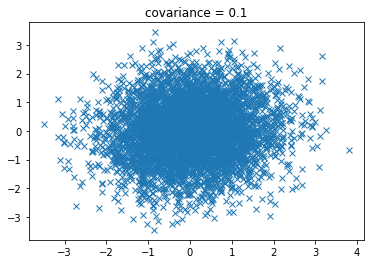

In [7]:
mean = np.array([0, 0]) # 平均を指定
cov = np.array([
        [1, 0.1],
        [0.1, 1]]) # 共分散行列を指定。0.1のところを変えればxとyの共分散の値を変えられる。
#指定された平均と共分散行列に沿ったランダムな値を生成してくれる関数
x, y = np.random.multivariate_normal(mean, cov, 5000).T # とりあえず5000個生成。
plt.plot(x, y, 'x')
plt.title("covariance = 0.1")
plt.show()

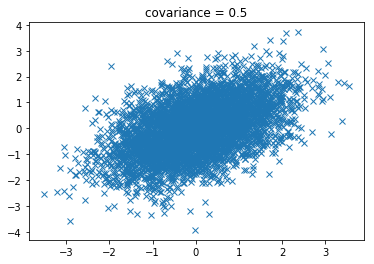

In [14]:
mean = np.array([0, 0]) 
cov = np.array([
        [1, 0.5],
        [0.5, 1]])
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.title("covariance = 0.5")
plt.show()

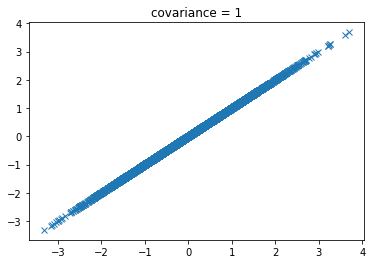

In [21]:
mean = np.array([0, 0])
cov = np.array([
        [1, 1],
        [1, 1]])
x, y = np.random.multivariate_normal(mean, cov, 5000).T # とりあえず5000個生成。
plt.plot(x, y, 'x')
plt.title("covariance = 1")
plt.show()

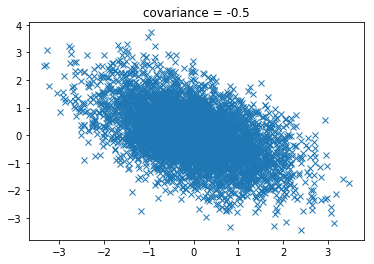

In [19]:
mean = np.array([0, 0])
cov = np.array([
        [1, -0.5],
        [-0.5, 1]]) # 負の相関
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.title("covariance = -0.5")
plt.show()

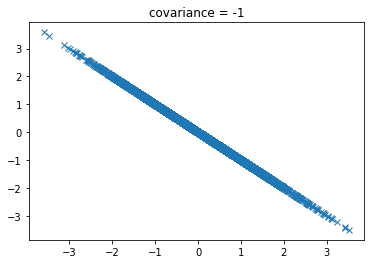

In [20]:
mean = np.array([0, 0])
cov = np.array([
        [1, -1],
        [-1, 1]]) # 負の相関
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.title("covariance = -1")
plt.show()

In [23]:
def covariance(x,y):
    return np.cov(x,y)[0][1]

In [29]:
x1 = np.arange(0,10)
x2 = np.arange(0,10)
print(x1)
print(x2)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [30]:
np.cov(x1,x2)

array([[9.16666667, 9.16666667],
       [9.16666667, 9.16666667]])

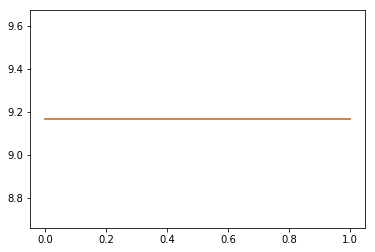

In [31]:
plt.plot(np.cov(x1,x2))
plt.show()

In [27]:
covariance(x1, x2)

9.166666666666666

# Generate data

In [46]:
import numpy as np
import matplotlib.pyplot as plt
def generate_linear_data(a, b, num):
    x = np.arange(0,num)
    y = (a*x +b) + (2*np.random.random((num)) - 1)
    return x,y

In [47]:
x,y = generate_linear_data(a=1,b=1,num=10)

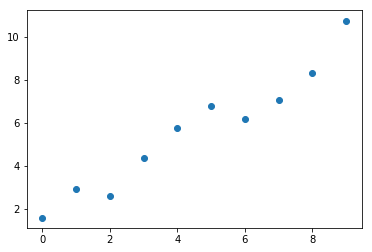

In [48]:
plt.scatter(x,y)
plt.show()

# Vanilla Linear regression

In [49]:
def covariance(x,y):
    return np.cov(x,y)[0][1]
def variance(x):
    return np.var(x)
def mean(x):
    return np.mean(x)

class LinearRegressionClosed:
# A closed form solution, for y = B0 + B1 * x, where            
# Solving parameters for derivative of RMSE?
    B0 = None
    B1 = None
        
    def fit(self, x_arr,y_arr):
        self.B1 = covariance(x_arr,y_arr)/variance(x_arr)
        self.B0 = mean(y_arr) - self.B1 *mean(x_arr)

    def predict(self, x_arr):
        y_arr = []
        for x in x_arr:
            y_arr.append(self.B0 + self.B1 * x)
        return y_arr
        
    def get_coefficients(self):
        return self.B0, self.B1

In [50]:
LR = LinearRegressionClosed()
LR.fit(x,y)

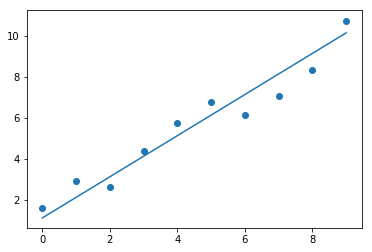

In [51]:
x_arr = range(10)
y_arr = LR.predict(x_arr)
plt.scatter(x,y)
plt.plot(x_arr, y_arr)
plt.show()

# Vanilla Linear regression with SGD

In [55]:
class LinearRegression:
    weights = None
    
    def fit(self, features, target, num_steps, lr, add_intercept = False):
        
        weights = np.random.normal(size=(features.shape[1],1))

        for step in range(num_steps):
            scores = np.matmul(features, weights)
            gradients = np.matmul(features.T, scores-target)
            weights -= lr * gradients
            
            #Print Loss every so often
            if step % 50 == 0:
                j = np.sum((np.square(scores-target)))
                print("Loss is in iteration "+str(step) + ": "+ str(j))                
        self.weights = weights
  
    def predict(self, features):
        return np.matmul(features, self.weights)

In [56]:
x_new = x.reshape((x.shape[0],-1))
y_new = y.reshape((y.shape[0],-1))
LR = LinearRegression()
LR.fit(x_new,y_new, 200, 0.005)

Loss is in iteration 0: 511.6402225708746
Loss is in iteration 50: 11.526830672736684
Loss is in iteration 100: 11.526830672736684
Loss is in iteration 150: 11.526830672736684


In [57]:
x_arr = np.arange(10).reshape((10,1))
y_arr = LR.predict(x_arr)


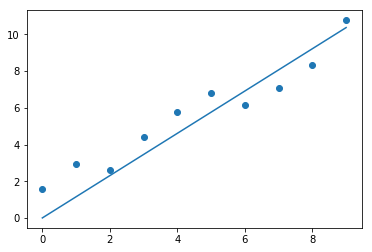

In [58]:
plt.scatter(x,y)
plt.plot(x_arr, y_arr)
plt.show()


# Scikit learn

In [60]:
from sklearn import linear_model
LR = linear_model.LinearRegression()
LR.fit(x_new,y_new)
print('Coefficients: \n', LR.coef_)

Coefficients: 
 [[0.90220726]]


/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


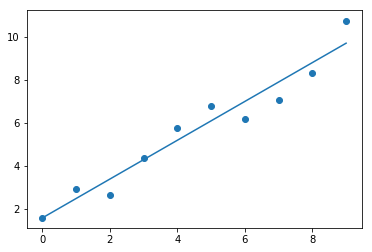

In [61]:
y_arr = LR.predict(x_arr)
plt.scatter(x,y)
plt.plot(x_arr, y_arr)
plt.show()
